# Confusion Matrix Vs ROC Curve

## Confusion Matrix

Ah, the confusion matrix! It's a handy tool often used in machine learning to evaluate the performance of classification models. The matrix itself is a table that helps you understand how your classifier's predictions match up with the actual labels. Here's what a basic confusion matrix might look like for a binary classification problem:

```
              Actual Positive  Actual Negative
Predicted Positive      TP              FP
Predicted Negative      FN              TN
```

- **TP (True Positive)**: The model correctly predicted the positive class.
- **FP (False Positive)**: The model incorrectly predicted the positive class.
- **TN (True Negative)**: The model correctly predicted the negative class.
- **FN (False Negative)**: The model incorrectly predicted the negative class.

### Metrics Derived from the Confusion Matrix

1. **Accuracy**: How often the model makes the correct prediction. \( \frac{TP + TN}{TP + TN + FP + FN} \)
  
2. **Precision**: When the model predicts the positive class, how often is it correct? \( \frac{TP}{TP + FP} \)
  
3. **Recall (or Sensitivity)**: How many of the actual positive cases did the model catch? \( \frac{TP}{TP + FN} \)
  
4. **F1 Score**: The harmonic mean of precision and recall. \( \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

5. **Specificity**: How many of the actual negative cases did the model catch? \( \frac{TN}{TN + FP} \)

Depending on your specific needs (like reducing false positives or catching all the positive samples), you might focus on optimizing for one of these metrics over the others.


## ROC Curve

ROC AUC stands for "Receiver Operating Characteristic Area Under the Curve." Let's break it down:

### ROC (Receiver Operating Characteristic) Curve
The ROC curve is a graphical representation that shows the performance of a binary classification model. The curve plots two parameters:

- **True Positive Rate (Sensitivity or Recall)** on the Y-axis: \( \frac{TP}{TP + FN} \)
- **False Positive Rate (1 - Specificity)** on the X-axis: \( \frac{FP}{TN + FP} \)

The ROC curve is generated by varying the classification threshold and plotting the True Positive Rate against the False Positive Rate. The 45-degree line often serves as a baseline.

### AUC (Area Under the Curve)
AUC gives the aggregate measure of the model's performance across all classification thresholds. The AUC can range from 0 to 1. Here's how to interpret the AUC:

- **AUC = 1**: The model perfectly distinguishes between the positive and negative classes.
- **0.5 < AUC < 1**: The model has a good measure of separability. A higher AUC indicates better performance.
- **AUC = 0.5**: The model can't distinguish between positive and negative classes (as good as random guessing).
- **AUC < 0.5**: The model is doing worse than random guessing, which is not a good sign.

### Why is ROC AUC Useful?
- **Imbalanced Classes**: ROC AUC is generally more robust than accuracy, especially for imbalanced datasets.
- **Comparing Models**: AUC provides a single scalar value to compare different models.
- **Tolerance**: It's insensitive to changes in the classification threshold, providing a 'big picture' measure of a model's performance.

In summary, ROC AUC is a comprehensive way to evaluate the performance of a binary classification model, taking into account various classification thresholds and imbalances in the dataset.

Confusion Matrix:
[[130  30]
 [ 24 116]]
Accuracy: 0.82
Precision: 0.79
Recall: 0.83
F1 Score: 0.81
ROC AUC Score: 0.9070535714285715


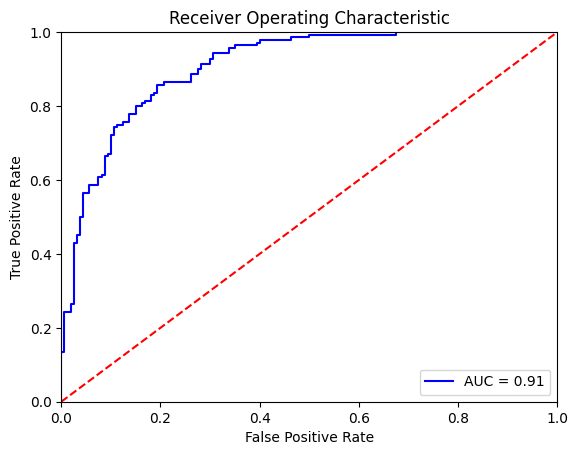

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_mat}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC Curve
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()